In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from scipy import stats
#from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#import numpy as np
#from scipy import stats
#import statsmodels.api as sm 

import os
os.chdir(r'E:\machineLearning')

benefits_df = pd.read_csv('BenefitsCostSharing.csv') 

C:\Users\user\AppData\Local\Temp\ipykernel_7280\2895800241.py:16: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  benefits_df = pd.read_csv('BenefitsCostSharing.csv')


In [2]:
benefits_df.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [3]:
benefits_df.shape

(5048408, 32)

In [4]:
benefits_df.columns

Index(['BenefitName', 'BusinessYear', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet',
       'EHBVarReason', 'Exclusions', 'Explanation', 'ImportDate', 'IsCovered',
       'IsEHB', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP', 'IsStateMandate',
       'IsSubjToDedTier1', 'IsSubjToDedTier2', 'IssuerId', 'IssuerId2',
       'LimitQty', 'LimitUnit', 'MinimumStay', 'PlanId', 'QuantLimitOnSvc',
       'RowNumber', 'SourceName', 'StandardComponentId', 'StateCode',
       'StateCode2', 'VersionNum'],
      dtype='object')

In [5]:
benefits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BenefitName          object 
 1   BusinessYear         int64  
 2   CoinsInnTier1        object 
 3   CoinsInnTier2        object 
 4   CoinsOutofNet        object 
 5   CopayInnTier1        object 
 6   CopayInnTier2        object 
 7   CopayOutofNet        object 
 8   EHBVarReason         object 
 9   Exclusions           object 
 10  Explanation          object 
 11  ImportDate           object 
 12  IsCovered            object 
 13  IsEHB                object 
 14  IsExclFromInnMOOP    object 
 15  IsExclFromOonMOOP    object 
 16  IsStateMandate       object 
 17  IsSubjToDedTier1     object 
 18  IsSubjToDedTier2     object 
 19  IssuerId             int64  
 20  IssuerId2            int64  
 21  LimitQty             float64
 22  LimitUnit            object 
 23  MinimumStay          float64
 24

In [6]:
benefits_df.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [7]:
# Update the BusinessYear column to 2022
benefits_df['BusinessYear'] = 2022

In [8]:
# Verify the changes
print(benefits_df['BusinessYear'].unique())

[2022]


In [9]:
# Check for missing values
missing_values = benefits_df.isnull().sum()
missing_values

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = round(benefits_df.isnull().mean() * 100, 2)
missing_percentage

BenefitName             0.00
BusinessYear            0.00
CoinsInnTier1          22.06
CoinsInnTier2          90.56
CoinsOutofNet          22.06
CopayInnTier1          22.06
CopayInnTier2          90.56
CopayOutofNet          22.06
EHBVarReason           59.84
Exclusions             90.57
Explanation            80.73
ImportDate              0.00
IsCovered               4.28
IsEHB                  36.00
IsExclFromInnMOOP      19.49
IsExclFromOonMOOP      19.46
IsStateMandate         84.19
IsSubjToDedTier1       48.84
IsSubjToDedTier2       48.85
IssuerId                0.00
IssuerId2               0.00
LimitQty               86.38
LimitUnit              86.37
MinimumStay            99.67
PlanId                  0.00
QuantLimitOnSvc        64.66
RowNumber               0.00
SourceName              0.00
StandardComponentId     0.00
StateCode               0.00
StateCode2              0.00
VersionNum              0.00
dtype: float64

In [11]:
# Drop columns with very high missing values
columns_to_drop = [
    'CoinsInnTier2', 'CopayInnTier2', 'Exclusions', 
    'IsStateMandate', 'LimitQty', 'LimitUnit', 'MinimumStay'
]
benefits_df = benefits_df.drop(columns=columns_to_drop)

In [12]:
benefits_df.shape

(5048408, 25)

In [13]:
missing_percentage = round(benefits_df.isnull().mean() * 100, 2)
missing_percentage

BenefitName             0.00
BusinessYear            0.00
CoinsInnTier1          22.06
CoinsOutofNet          22.06
CopayInnTier1          22.06
CopayOutofNet          22.06
EHBVarReason           59.84
Explanation            80.73
ImportDate              0.00
IsCovered               4.28
IsEHB                  36.00
IsExclFromInnMOOP      19.49
IsExclFromOonMOOP      19.46
IsSubjToDedTier1       48.84
IsSubjToDedTier2       48.85
IssuerId                0.00
IssuerId2               0.00
PlanId                  0.00
QuantLimitOnSvc        64.66
RowNumber               0.00
SourceName              0.00
StandardComponentId     0.00
StateCode               0.00
StateCode2              0.00
VersionNum              0.00
dtype: float64

In [14]:
benefits_df['CoinsInnTier1']=benefits_df['CoinsInnTier1'].str.replace(r'\D+', '', regex=True)

In [15]:
benefits_df['CoinsOutofNet']=benefits_df['CoinsOutofNet'].str.replace(r'\D+', '', regex=True)

In [16]:
benefits_df['CopayInnTier1']=benefits_df['CopayInnTier1'].str.replace(r'\D+', '', regex=True)

In [17]:
benefits_df['CopayOutofNet']=benefits_df['CopayOutofNet'].str.replace(r'\D+', '', regex=True)

In [18]:
benefits_df.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsOutofNet,CopayInnTier1,CopayOutofNet,EHBVarReason,Explanation,ImportDate,IsCovered,...,IssuerId,IssuerId2,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2022,20,20,,,Above EHB,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,...,21989,21989,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2022,20,20,,,Substantially Equal,See policy for additional limitations,2014-03-19 07:06:49,Covered,...,21989,21989,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2022,40,40,,,Substantially Equal,See policy for additional limitations,2014-03-19 07:06:49,Covered,...,21989,21989,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2022,50,50,,,Additional EHB Benefit,"24 month waiting period, See policy for additi...",2014-03-19 07:06:49,Covered,...,21989,21989,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2022,50,50,,,Substantially Equal,See policy for additional limitations,2014-03-19 07:06:49,Covered,...,21989,21989,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [19]:
benefits_df['CopayInnTier1'].isnull().sum()

1113847

In [20]:
#benefits_df.to_csv('benifitsckleaned1.csv', index=False)

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
benefits_df[['CoinsInnTier1']] = imputer.fit_transform(benefits_df[['CoinsInnTier1']])
benefits_df[['CoinsOutofNet']] = imputer.fit_transform(benefits_df[['CoinsOutofNet']])
benefits_df[['CopayInnTier1']] = imputer.fit_transform(benefits_df[['CopayInnTier1']])
benefits_df[['CopayOutofNet']] = imputer.fit_transform(benefits_df[['CopayOutofNet']])

In [22]:
benefits_df.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1                0
CoinsOutofNet                0
CopayInnTier1                0
CopayOutofNet                0
EHBVarReason           3020737
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: int64

In [23]:
round(benefits_df.isnull().mean() * 100, 2)

BenefitName             0.00
BusinessYear            0.00
CoinsInnTier1           0.00
CoinsOutofNet           0.00
CopayInnTier1           0.00
CopayOutofNet           0.00
EHBVarReason           59.84
Explanation            80.73
ImportDate              0.00
IsCovered               4.28
IsEHB                  36.00
IsExclFromInnMOOP      19.49
IsExclFromOonMOOP      19.46
IsSubjToDedTier1       48.84
IsSubjToDedTier2       48.85
IssuerId                0.00
IssuerId2               0.00
PlanId                  0.00
QuantLimitOnSvc        64.66
RowNumber               0.00
SourceName              0.00
StandardComponentId     0.00
StateCode               0.00
StateCode2              0.00
VersionNum              0.00
dtype: float64

In [24]:
#benefits_df.to_csv('benifitsckleaned2.csv', index=False)

In [25]:
#apply mode for categorical data


imputer = SimpleImputer(strategy='most_frequent')
benefits_df[['EHBVarReason']] = imputer.fit_transform(benefits_df[['EHBVarReason']])

benefits_df[['IsEHB']] = imputer.fit_transform(benefits_df[['IsEHB']])
benefits_df[['IsExclFromInnMOOP']] = imputer.fit_transform(benefits_df[['IsExclFromInnMOOP']])
benefits_df[['IsExclFromOonMOOP']] = imputer.fit_transform(benefits_df[['IsExclFromOonMOOP']])
benefits_df[['IsSubjToDedTier1']] = imputer.fit_transform(benefits_df[['IsSubjToDedTier1']])
benefits_df[['IsSubjToDedTier2']] = imputer.fit_transform(benefits_df[['IsSubjToDedTier2']])
benefits_df[['QuantLimitOnSvc']] = imputer.fit_transform(benefits_df[['QuantLimitOnSvc']])

In [26]:
round(benefits_df.isnull().mean() * 100, 2)

BenefitName             0.00
BusinessYear            0.00
CoinsInnTier1           0.00
CoinsOutofNet           0.00
CopayInnTier1           0.00
CopayOutofNet           0.00
EHBVarReason            0.00
Explanation            80.73
ImportDate              0.00
IsCovered               4.28
IsEHB                   0.00
IsExclFromInnMOOP       0.00
IsExclFromOonMOOP       0.00
IsSubjToDedTier1        0.00
IsSubjToDedTier2        0.00
IssuerId                0.00
IssuerId2               0.00
PlanId                  0.00
QuantLimitOnSvc         0.00
RowNumber               0.00
SourceName              0.00
StandardComponentId     0.00
StateCode               0.00
StateCode2              0.00
VersionNum              0.00
dtype: float64

In [27]:
ind=benefits_df[benefits_df['IsCovered'].isnull()].index
ind

Int64Index([      6,       8,      15,      17,      24,      26,      33,
                 35,      42,      44,
            ...
            5048390, 5048395, 5048396, 5048397, 5048398, 5048399, 5048404,
            5048405, 5048406, 5048407],
           dtype='int64', length=215980)

In [28]:
benefits_df.drop(ind, inplace=True)

In [29]:
benefits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832428 entries, 0 to 5048403
Data columns (total 25 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   BenefitName          object
 1   BusinessYear         int64 
 2   CoinsInnTier1        object
 3   CoinsOutofNet        object
 4   CopayInnTier1        object
 5   CopayOutofNet        object
 6   EHBVarReason         object
 7   Explanation          object
 8   ImportDate           object
 9   IsCovered            object
 10  IsEHB                object
 11  IsExclFromInnMOOP    object
 12  IsExclFromOonMOOP    object
 13  IsSubjToDedTier1     object
 14  IsSubjToDedTier2     object
 15  IssuerId             int64 
 16  IssuerId2            int64 
 17  PlanId               object
 18  QuantLimitOnSvc      object
 19  RowNumber            int64 
 20  SourceName           object
 21  StandardComponentId  object
 22  StateCode            object
 23  StateCode2           object
 24  VersionNum           int

In [30]:
#explaination is not much useful for markey coverage 
benefits_df = benefits_df.drop('Explanation', axis=1)

In [31]:
#drop IssuerId2-- duplicate col of issuerId
benefits_df = benefits_df.drop('IssuerId2', axis=1)
benefits_df = benefits_df.drop('StateCode2', axis=1)
benefits_df = benefits_df.drop('RowNumber', axis=1)        

In [32]:
benefits_df.isnull().sum()

BenefitName            0
BusinessYear           0
CoinsInnTier1          0
CoinsOutofNet          0
CopayInnTier1          0
CopayOutofNet          0
EHBVarReason           0
ImportDate             0
IsCovered              0
IsEHB                  0
IsExclFromInnMOOP      0
IsExclFromOonMOOP      0
IsSubjToDedTier1       0
IsSubjToDedTier2       0
IssuerId               0
PlanId                 0
QuantLimitOnSvc        0
SourceName             0
StandardComponentId    0
StateCode              0
VersionNum             0
dtype: int64

In [33]:
# Define a list of possible formats
date_formats = [
    '%Y-%m-%d %H:%M:%S',  # Format with full year, month, day, hour, minute, second
    '%m/%d/%Y %H:%M',     # Format with month/day/year hour:minute
    '%m/%d/%Y %I:%M%p',   # Format with month/day/year hour:minute AM/PM
    # Add more formats if needed
]

# Function to try multiple formats
def parse_date(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the function to 'ImportDate'
benefits_df['ImportDate'] = benefits_df['ImportDate'].apply(parse_date)

In [34]:
# Define a function to update the year
def update_year(date):
    if date.year == 2013:
        return date.replace(year=2021)
    elif date.year == 2014:
        return date.replace(year=2022)
    elif date.year == 2015:
        return date.replace(year=2023)
    else:
        return None
    
benefits_df['ImportDate'] = benefits_df['ImportDate'].apply(update_year)

In [36]:
# assume 'df' is your DataFrame and 'ImportDate' is the column with the date strings

benefits_df['ImportDate'] = pd.to_datetime(benefits_df['ImportDate'])
benefits_df['ImportDate'] = benefits_df['ImportDate'].astype('int64') // 10**9

In [37]:
benefits_df.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsOutofNet,CopayInnTier1,CopayOutofNet,EHBVarReason,ImportDate,IsCovered,IsEHB,...,IsExclFromOonMOOP,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,PlanId,QuantLimitOnSvc,SourceName,StandardComponentId,StateCode,VersionNum
0,Routine Dental Services (Adult),2022,20,20,,,Above EHB,1647673609,Covered,Yes,...,No,No,No,21989,21989AK0010001-00,Yes,HIOS,21989AK0010001,AK,6
1,Dental Check-Up for Children,2022,20,20,,,Substantially Equal,1647673609,Covered,Yes,...,No,No,No,21989,21989AK0010001-00,Yes,HIOS,21989AK0010001,AK,6
2,Basic Dental Care - Child,2022,40,40,,,Substantially Equal,1647673609,Covered,Yes,...,No,Yes,Yes,21989,21989AK0010001-00,No,HIOS,21989AK0010001,AK,6
3,Orthodontia - Child,2022,50,50,,,Additional EHB Benefit,1647673609,Covered,Yes,...,No,Yes,Yes,21989,21989AK0010001-00,No,HIOS,21989AK0010001,AK,6
4,Major Dental Care - Child,2022,50,50,,,Substantially Equal,1647673609,Covered,Yes,...,No,Yes,Yes,21989,21989AK0010001-00,No,HIOS,21989AK0010001,AK,6


In [ ]:
benefits_df.to_csv('benefitscleaned1.csv', index=False)

In [38]:
benefits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832428 entries, 0 to 5048403
Data columns (total 21 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   BenefitName          object
 1   BusinessYear         int64 
 2   CoinsInnTier1        object
 3   CoinsOutofNet        object
 4   CopayInnTier1        object
 5   CopayOutofNet        object
 6   EHBVarReason         object
 7   ImportDate           int64 
 8   IsCovered            object
 9   IsEHB                object
 10  IsExclFromInnMOOP    object
 11  IsExclFromOonMOOP    object
 12  IsSubjToDedTier1     object
 13  IsSubjToDedTier2     object
 14  IssuerId             int64 
 15  PlanId               object
 16  QuantLimitOnSvc      object
 17  SourceName           object
 18  StandardComponentId  object
 19  StateCode            object
 20  VersionNum           int64 
dtypes: int64(4), object(17)
memory usage: 811.1+ MB


In [ ]:
#Handling benefit name column

In [39]:
benefits_df['BenefitName'] = benefits_df['BenefitName'].str.lower()
benefits_df['BenefitName'] = benefits_df['BenefitName'].str.replace(r'[^\w\s]', '', regex=True)
benefits_df['BenefitName'] = benefits_df['BenefitName'].str.strip()

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
benefits_df['BenefitName'] = le.fit_transform(benefits_df['BenefitName'])

In [41]:

benefits_df['CoinsInnTier1'] = le.fit_transform(benefits_df['CoinsInnTier1'])
benefits_df['CoinsOutofNet'] = le.fit_transform(benefits_df['CoinsOutofNet'])
benefits_df['CopayInnTier1'] = le.fit_transform(benefits_df['CopayInnTier1'])
benefits_df['CopayOutofNet'] = le.fit_transform(benefits_df['CopayOutofNet'])
benefits_df['EHBVarReason'] = le.fit_transform(benefits_df['EHBVarReason'])
benefits_df['IsCovered'] = le.fit_transform(benefits_df['IsCovered'])
benefits_df['IsEHB'] = le.fit_transform(benefits_df['IsEHB'])
benefits_df['IsExclFromInnMOOP'] = le.fit_transform(benefits_df['IsExclFromInnMOOP'])
benefits_df['IsExclFromOonMOOP'] = le.fit_transform(benefits_df['IsExclFromOonMOOP'])
benefits_df['IsSubjToDedTier1'] = le.fit_transform(benefits_df['IsSubjToDedTier1'])
benefits_df['IsSubjToDedTier2'] = le.fit_transform(benefits_df['IsSubjToDedTier2'])
benefits_df['PlanId'] = le.fit_transform(benefits_df['PlanId'])
benefits_df['QuantLimitOnSvc'] = le.fit_transform(benefits_df['QuantLimitOnSvc'])
benefits_df['SourceName'] = le.fit_transform(benefits_df['SourceName'])
benefits_df['StandardComponentId'] = le.fit_transform(benefits_df['StandardComponentId'])
benefits_df['StateCode'] = le.fit_transform(benefits_df['StateCode'])


In [42]:
benefits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832428 entries, 0 to 5048403
Data columns (total 21 columns):
 #   Column               Dtype
---  ------               -----
 0   BenefitName          int32
 1   BusinessYear         int64
 2   CoinsInnTier1        int32
 3   CoinsOutofNet        int32
 4   CopayInnTier1        int32
 5   CopayOutofNet        int32
 6   EHBVarReason         int32
 7   ImportDate           int64
 8   IsCovered            int32
 9   IsEHB                int32
 10  IsExclFromInnMOOP    int32
 11  IsExclFromOonMOOP    int32
 12  IsSubjToDedTier1     int32
 13  IsSubjToDedTier2     int32
 14  IssuerId             int64
 15  PlanId               int32
 16  QuantLimitOnSvc      int32
 17  SourceName           int32
 18  StandardComponentId  int32
 19  StateCode            int32
 20  VersionNum           int64
dtypes: int32(17), int64(4)
memory usage: 497.7 MB


In [43]:
benefits_df.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsOutofNet,CopayInnTier1,CopayOutofNet,EHBVarReason,ImportDate,IsCovered,IsEHB,...,IsExclFromOonMOOP,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,PlanId,QuantLimitOnSvc,SourceName,StandardComponentId,StateCode,VersionNum
0,645,2022,15,8,0,0,1,1647673609,0,0,...,1,0,1,21989,6560,2,0,2023,0,6
1,153,2022,15,8,0,0,6,1647673609,0,0,...,1,0,1,21989,6560,2,0,2023,0,6
2,61,2022,36,17,0,0,6,1647673609,0,0,...,1,2,2,21989,6560,1,0,2023,0,6
3,473,2022,45,22,0,0,3,1647673609,0,0,...,1,2,2,21989,6560,1,0,2023,0,6
4,366,2022,45,22,0,0,6,1647673609,0,0,...,1,2,2,21989,6560,1,0,2023,0,6


In [44]:
# Correlation matrix
correlation_matrix = benefits_df.corr()

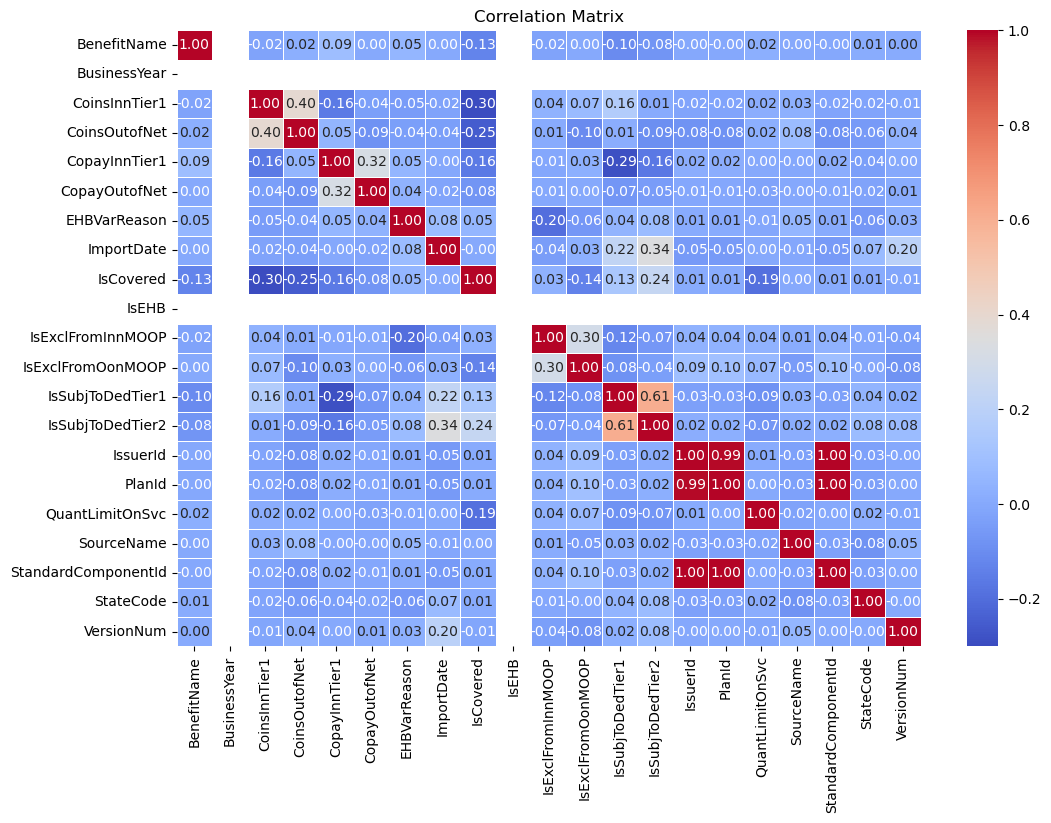

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Calculate the Pearson correlation coefficient for numerical features
correlations = benefits_df.corr()
target_correlations = correlations['IsCovered'].sort_values(ascending=False)
print(target_correlations)

IsCovered              1.000000
IsSubjToDedTier2       0.241293
IsSubjToDedTier1       0.132882
EHBVarReason           0.050474
IsExclFromInnMOOP      0.033712
PlanId                 0.009224
StandardComponentId    0.008771
IssuerId               0.007535
StateCode              0.006227
SourceName             0.002727
ImportDate            -0.000180
VersionNum            -0.014589
CopayOutofNet         -0.075829
BenefitName           -0.127852
IsExclFromOonMOOP     -0.135366
CopayInnTier1         -0.161164
QuantLimitOnSvc       -0.188568
CoinsOutofNet         -0.251224
CoinsInnTier1         -0.300270
BusinessYear                NaN
IsEHB                       NaN
Name: IsCovered, dtype: float64


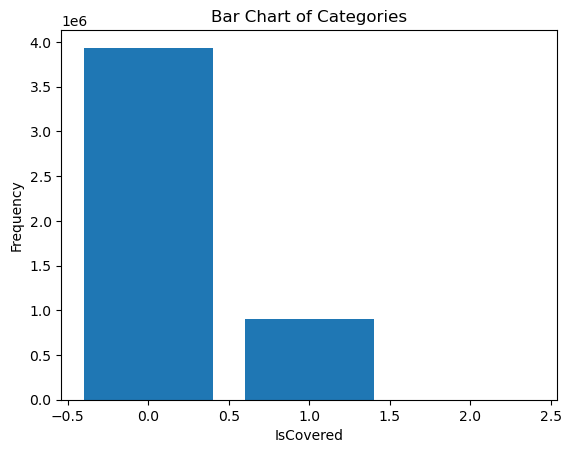

In [69]:
import matplotlib.pyplot as plt

# assume 'category' is a categorical column in a pandas DataFrame 'df'
plt.bar(benefits_df['IsCovered'].value_counts().index, benefits_df['IsCovered'].value_counts().values)
plt.xlabel('IsCovered')
plt.ylabel('Frequency')
plt.title('Bar Chart of Categories')
plt.show()

In [47]:

# Train a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier


In [48]:
# Define features and target variable
X = benefits_df.drop(columns=['IsCovered'])
y = benefits_df['IsCovered']

In [49]:
# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True) 

In [52]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
from sklearn.metrics import accuracy_score
# Evaluate the model
y_pred = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.988559241071952


In [55]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1180146
           1       0.95      0.99      0.97    269347
           2       1.00      0.97      0.99       236

    accuracy                           0.99   1449729
   macro avg       0.98      0.99      0.98   1449729
weighted avg       0.99      0.99      0.99   1449729



In [56]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1165318   14828       0]
 [   1752  267595       0]
 [      0       6     230]]


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8140459354817349


In [63]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1180146       0       0]
 [ 269347       0       0]
 [    236       0       0]]


In [64]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90   1180146
           1       0.00      0.00      0.00    269347
           2       0.00      0.00      0.00       236

    accuracy                           0.81   1449729
   macro avg       0.27      0.33      0.30   1449729
weighted avg       0.66      0.81      0.73   1449729



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [66]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  

In [71]:
# Predict classes
y_pred = model.predict(X_test)

In [72]:
# Evaluate performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9992281316025271
Confusion Matrix:
[[1179732     414       0]
 [    703  268642       2]
 [      0       0     236]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1180146
           1       1.00      1.00      1.00    269347
           2       0.99      1.00      1.00       236

    accuracy                           1.00   1449729
   macro avg       1.00      1.00      1.00   1449729
weighted avg       1.00      1.00      1.00   1449729



In [73]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred_prob)
print(f'R-squared: {r2}')

R-squared: 0.9898540810859509


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(gbc, X, y, cv=kfold, scoring='accuracy')

In [ ]:
# List of selected features--11 columns
features_sel = ['CoinsOutofNet', 'CoinsInnTier1', 'CopayInnTier1', 'CopayOutofNet', 'IsExclFromInnMOOP'
                ,'IsExclFromOonMOOP','IsSubjToDedTier1','IsSubjToDedTier2','IssuerId','PlanId',
                'StandardComponentId']